# Bitcoin Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("btcdata.csv")
df = df.dropna() #remove rows with no value
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df = df.set_index('Timestamp')


### Analyzing BTC data on months (on 1, 3, 5 and total years)

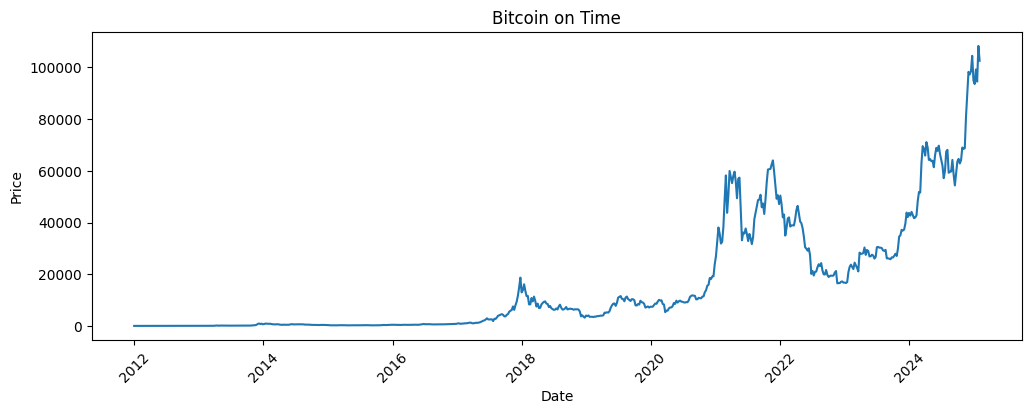

In [49]:
#Data we want to show (here the average at every monthly close)
#df_daily = df['Close'].resample('D').mean()
df_daily = df['Open'].resample('W').first()

plt.figure(figsize=(12, 4))
plt.plot(df_daily.index, df_daily.values)
plt.title('Bitcoin on Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45) #to make the year text rotate a bit (more readable)
plt.show()

### Trying to plot BTC on time (12 points per year)